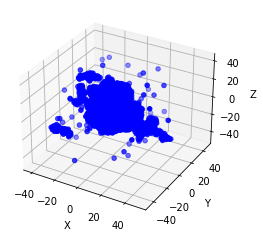

In [4]:
#visualizing a pdb file 




from Bio import PDB
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to extract atomic coordinates from a PDB file
def extract_coordinates(pdb_file):
    parser = PDB.PDBParser(QUIET=True)
    structure = parser.get_structure('protein', pdb_file)

    coordinates = []
    for model in structure:
        for chain in model:
            for residue in chain:
                for atom in residue:
                    coordinates.append(atom.get_coord())

    return coordinates

# Function to visualize atomic coordinates in 3D
def visualize_coordinates(coordinates):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    x, y, z = zip(*coordinates)
    ax.scatter(x, y, z, c='b', marker='o')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

# Specify the path to your PDB file
pdb_file_path = '/home/nayanika/github/PhD_Thesis/Simulation/cpptraj_scripts/Files/GSSG/MDmousecys.pdb'

# Extract coordinates
atom_coordinates = extract_coordinates(pdb_file_path)

# Visualize the coordinates in 3D
visualize_coordinates(atom_coordinates)

In [21]:
import nglview
from Bio import PDB

# Specify the path to your PDB file
pdb_file_path = '/home/nayanika/github/References/figures/catalytic_triad.pdb'

# Load the structure using Biopython
parser = PDB.PDBParser(QUIET=True)
structure = parser.get_structure('protein', pdb_file_path)

# Define the residues you want to display as sticks
# Here, we're selecting residues 10 to 20
residue_selection = '30-40'

# Create an NGLView instance
view = nglview.show_biopython(structure)

# Add cartoon representation
view.add_cartoon()

# Add sticks representation for the selected residues
view.add_representation('stick', selection=residue_selection, color='white')

# Center the view
view.center()

# Show the widget
view

NGLWidget()

In [5]:
import nglview
from Bio import PDB
import py3Dmol  # Import the py3Dmol library

# Specify the path to your PDB file
pdb_file_path = '/home/nayanika/github/References/figures/catalytic_triad.pdb'

# Load the structure using Biopython
parser = PDB.PDBParser(QUIET=True)
structure = parser.get_structure('protein', pdb_file_path)

# Create an NGLview widget with increased width and height
view_ngl = nglview.show_biopython(structure)
view_ngl.add_representation('cartoon')
view_ngl.center()

# Increase the size of the widget
view_ngl._remote_call("setSize", target="Widget", args=["100%", "400px"])

# Create a PyMOL viewer
view_pymol = py3Dmol.view(width=800, height=400)

# Load the structure into PyMOL
view_pymol.addModel(open(pdb_file_path).read(), 'pdb')

# Show the widgets side by side
view_ngl.display(gui=True)
view_pymol.show()

ThemeManager()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [22]:
import cv2
import numpy as np

def remove_black_background(image_path):
    # Read the image
    image = cv2.imread(image_path)
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Threshold the image to get a binary mask of the black background
    _, mask = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)
    
    # Invert the mask (black background becomes white)
    mask = cv2.bitwise_not(mask)
    
    # Use the mask to extract the foreground
    result = cv2.bitwise_and(image, image, mask=mask)
    
    # Add white background
    result[np.where((result == [0,0,0]).all(axis=2))] = [255, 255, 255]
    
    return result

# Path to your image
image_path = '/home/nayanika/github/References/figures/Screenshot from 2024-03-14 00-59-33.png'

# Remove black background and make it white
result_image = remove_black_background(image_path)

# Display the result
cv2.imshow('Result', result_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

ModuleNotFoundError: No module named 'cv2'

In [36]:
import nglview
from Bio import PDB
from io import StringIO

# Specify the path to your PDB file
pdb_file_path = '/home/nayanika/github/References/figures/catalytic_triad.pdb'

# Load the structure using Biopython
parser = PDB.PDBParser(QUIET=True)
structure = parser.get_structure('protein', pdb_file_path)

# Define the residues you want to display as sticks
# Here, we're selecting residues 10 to 20
residue_selection = range(30, 41)

# Convert the Biopython structure to a PDB string
io = StringIO()
PDB.PDBIO().set_structure(structure)
PDB.PDBIO().save(io)
pdb_string = io.getvalue()

# Create an NGLView instance
view = nglview.NGLWidget()

# Add the structure to the view
view.add_component(pdb_string, ext='pdb')

# Add cartoon representation
view.add_cartoon()

# Add sticks representation for the selected residues
view.add_representation('ball+stick', selection=":".join([f"({res})" for res in residue_selection]), color='white')

# Center the view
view.center_view()

# Show the widget
view

AttributeError: 'PDBIO' object has no attribute 'structure'